In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
import seaborn as sns

# 1. Preprocessing

# import the data and convert it to dataframe

In [14]:
df= pd.read_csv('arrhythmia.data',names=("Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","Class"))


df = df.replace('?',np.nan)

In [15]:
df.head().transpose()

,0,1,2,3,4
Age,75,56,54,55,75
Sex,0,1,0,0,0
Height,190,165,172,175,190
Weight,80,64,95,94,80
QRS_Dur,91,81,138,100,88
...,...,...,...,...,...
V6276,0.9,0.2,0.3,0.4,-0.1
V6277,2.9,2.1,3.4,2.6,3.9
V6278,23.3,20.4,12.3,34.6,25.4
V6279,49.4,38.8,49.0,61.6,62.8


In [16]:
df.shape

(452, 280)

In [17]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


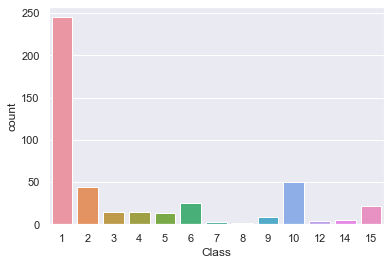

In [18]:
sns.set()
df["Class"] = df["Class"].astype(int)
class_count=sns.countplot(x="Class", data=df)
plt.gca().set_xticklabels(['1','2' ,'3' ,'4', '5' , '6' ,'7','8' ,'9' ,'10'  ,'12' , '14', '15']);

class_count.figure.savefig('class.png')

# identifiying missing values

In [19]:
df.isna().sum().sum()

408

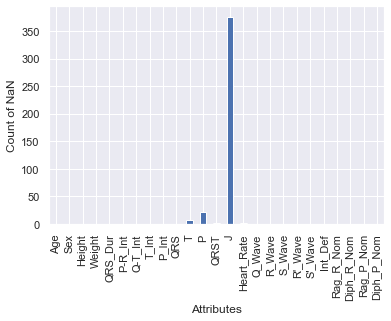

In [20]:
pd.isnull(df).sum()[0:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN');

In [21]:
df.dropna(thresh=0.5*len(df),axis=1,inplace=True)
df.shape

(452, 279)

In [22]:
df.isna().sum().sum()

32

# get the numeric columns and fill the missing values

In [23]:
df= df.fillna(df.mean().iloc[0])

df.isna().sum().sum()

0

In [ ]:
g = sns.PairGrid(df, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();


# Normalize the scale

In [24]:
sc=MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop('Class', axis=1)),columns = (df.drop('Class', axis=1)).columns)

# 2. Constante and Quasi constante features Removal

In [25]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features

# Use the function to get the results in dataframe
constant_features = get_constant_features(df_scaled)
display_all(constant_features)

,Desc,Var,Value,Perc
0,Constant,V6275,0.0,100.000000
1,Constant,V5265,0.0,100.000000
2,Constant,V610,0.0,100.000000
3,Constant,V609,0.0,100.000000
4,Constant,V604,0.0,100.000000
5,Constant,V510,0.0,100.000000
6,Constant,V508,0.0,100.000000
7,Constant,V506,0.0,100.000000
8,Constant,V504,0.0,100.000000
9,Constant,V409,0.0,100.000000


In [26]:
# All the constant features stored in a list
constant_features_list = constant_features['Var'].to_list()

In [27]:
# Drop all the constant features from the dataset
df_scaled.drop(columns = constant_features_list, inplace=True)

# 2.1 Feature Selection

In [136]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif,k=79)

In [137]:
X_selected = fs.fit_transform(df_scaled, df["Class"])

In [138]:
np.sort(fs.scores_)[::-1]

array([101.51397557,  60.55653324,  35.97760367,  33.08298688,
        32.22028272,  31.44821032,  30.4154651 ,  29.58064927,
        26.5653909 ,  25.63613499,  25.02716433,  24.57714375,
        23.27009439,  22.84284136,  22.77402898,  22.47761747,
        22.36837798,  21.95560014,  21.59859739,  21.20095719,
        20.91054724,  20.41392323,  18.99026818,  18.97032573,
        16.26342978,  15.96064364,  15.33070001,  14.98273737,
        14.72404555,  14.46075349,  14.39627828,  14.14234521,
        14.01289558,  13.93285019,  13.81659477,  13.73912293,
        13.69353973,  12.81286788,  12.7548886 ,  12.61320698,
        12.59714005,  12.10780115,  11.96030436,  11.76417633,
        11.43193477,  10.90997822,  10.54946945,  10.39735695,
        10.34597695,  10.26065397,  10.12749725,  10.10263338,
        10.04813534,   9.67375557,   9.56611904,   9.3916062 ,
         9.2792431 ,   8.93630327,   8.81765191,   8.68772197,
         8.55629506,   8.510821  ,   8.47563219,   8.40

In [139]:
X_selected.shape

(452, 79)

In [ ]:
correlation = df_scaled.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

# 3. KFold Train, Test and Validation

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, cross_validate 
from sklearn.model_selection import KFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [141]:
cv = KFold(n_splits=5, shuffle=True)

# KNN

In [142]:
accuracy = []    
precision = []   
recall = []      
f1score = []    


for i in range(31):
    accuracy.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score,average='micro'))) 
    recall.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score,average='micro'))) 
    f1score.append(cross_val_score(KNeighborsClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score,average='micro'))) 

In [143]:
X11= np.max(accuracy)
X12= np.min(accuracy)
X13= np.std(accuracy)
X14= np.mean(accuracy)

In [144]:
Y11= np.max(precision)
Y12= np.min(precision)
Y13= np.std(precision)
Y14= np.mean(precision)

In [145]:
Z11= np.max(recall)
Z12= np.min(recall)
Z13= np.std(recall)
Z14= np.mean(recall)

In [146]:
F11= np.max(f1score)
F12= np.min(f1score)
F13= np.std(f1score)
F14= np.mean(f1score)

# SVM

In [147]:
accuracy = []    #make_scorer(accuracy_score)
precision = []   #make_scorer(precision_score)
recall = []      #make_scorer(recall_score)
f1score = []    #make_scorer(f1_score)

for i in range(31):
    accuracy.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score,average='micro'))) 
    recall.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score,average='micro'))) 
    f1score.append(cross_val_score(SVC(),X_selected,df["Class"],cv=cv, scoring =  make_scorer(f1_score,average='micro'))) 

In [148]:
X21= np.max(accuracy)
X22= np.min(accuracy)
X23= np.std(accuracy)
X24= np.mean(accuracy)

In [149]:
Y21= np.max(precision)
Y22= np.min(precision)
Y23= np.std(precision)
Y24= np.mean(precision)

In [150]:
Z21= np.max(recall)
Z22= np.min(recall)
Z23= np.std(recall)
Z24= np.mean(recall)

In [151]:
F21= np.max(f1score)
F22= np.min(f1score)
F23= np.std(f1score)
F24= np.mean(f1score)

# Bayes

In [152]:
accuracy = []    #make_scorer(accuracy_score)
precision = []   #make_scorer(precision_score)
recall = []      #make_scorer(recall_score)
f1score = []    #make_scorer(f1_score)


for i in range(31):
    accuracy.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score,average='micro'))) 
    recall.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score,average='micro'))) 
    f1score.append(cross_val_score(GaussianNB(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score,average='micro'))) 

In [153]:
X31= np.max(accuracy)
X32= np.min(accuracy)
X33= np.std(accuracy)
X34= np.mean(accuracy)

In [154]:
Y31= np.max(precision)
Y32= np.min(precision)
Y33= np.std(precision)
Y34= np.mean(precision)

In [155]:
Z31= np.max(recall)
Z32= np.min(recall)
Z33= np.std(recall)
Z34= np.mean(recall)

In [156]:
F31= np.max(f1score)
F32= np.min(f1score)
F33= np.std(f1score)
F34= np.mean(f1score)

# Arbre de decision

In [157]:
accuracy = []    #make_scorer(accuracy_score)
precision = []   #make_scorer(precision_score)
recall = []      #make_scorer(recall_score)
f1score = []    #make_scorer(f1_score)


for i in range(31):
    accuracy.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(precision_score,average='micro'))) 
    recall.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(recall_score,average='micro'))) 
    f1score.append(cross_val_score(DecisionTreeClassifier(),X_selected,df["Class"],cv=cv, scoring = make_scorer(f1_score,average='micro'))) 

In [158]:
X41= np.max(accuracy)
X42= np.min(accuracy)
X43= np.std(accuracy)
X44= np.mean(accuracy)

In [159]:
Y41= np.max(precision)
Y42= np.min(precision)
Y43= np.std(precision)
Y44= np.mean(precision)

In [160]:
Z41= np.max(recall)
Z42= np.min(recall)
Z43= np.std(recall)
Z44= np.mean(recall)

In [161]:
F41= np.max(f1score)
F42= np.min(f1score)
F43= np.std(f1score)
F44= np.mean(f1score)

In [162]:

path = r"C:\Users\MAXFRAME\Desktop\Classification\arryhthmiaclassif.xlsx"

dami={'KNN':[X11,X12,X13,X14,Y11,Y12,Y13,Y14,Z11,Z12,Z13,Z14,F11,F12,F13,F14],'ARBRE DE DECISION':[X41,X42,X43,X44,Y41,Y42,Y43,Y44,Z41,Z42,Z43,Z44,F41,F42,F43,F44],'BAYES':[X31,X32,X33,X34,Y31,Y32,Y33,Y34,Z31,Z32,Z33,Z34,F31,F32,F33,F34],'SVM':[X21,X22,X23,X24,Y21,Y22,Y23,Y24,Z21,Z22,Z23,Z24,F21,F22,F23,F24]}
df1 = pd.DataFrame(dami,index=['Maximum (Accuracy)', 'Minimum (Accuracy)','Ecart type (Accuracy)', 'Moyenne (Accuracy)','Maximum (Precision)', 'Minimum (Precision)','Ecart type (Precision)', 'Moyenne (Precision)','Maximum (Recall)', 'Minimum (Recall)','Ecart type (Recall)', 'Moyenne (Recall)','Maximum (F1 score)', 'Minimum (F1 score)','Ecart type (F1 score)', 'Moyenne (F1 score)'])

writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
df1.to_excel(writer)

writer.save()
writer.close()

F:\conda\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
